# House price prediction

## Introduction
This assignment is to try out following Regression techniques on famous housing datset, to predict housing price.
1. Linear Regression
2. Decision tree
3. Random Forest
4. SVM
5. Gradient boosting Decision tree
6. XGBoost
7. AdaBoost

Dataset: Ames Housing dataset 

## Load Data and Packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import inv_boxcox
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [21]:
train = pd.read_csv("data/train.csv")
#test = pd.read_csv("data/test.csv")

In [22]:
# to make this notebook's output stable across runs
np.random.seed(42)
random_state = 42

In [23]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Analysis

In [24]:
print("Train dataset shape : ",train.shape)
#print("Test dataset shape : ",test.shape)

Train dataset shape :  (1460, 81)


In [25]:
print("Number of datapoints in the train data set : {} and the number of attributes including label : {}".format(*(train.shape)))
#print("Number of datapoints in the test data set : {} and the number of attributes without label : {}".format(*(test.shape)))
print("Column in the input data : ")
train.info()

Number of datapoints in the train data set : 1460 and the number of attributes including label : 81
Column in the input data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd

In [26]:
#Look for all columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

__Observations__ :
-  There are total of 1460 datapoints in training set.
-  There are total of 1459 datapoints in training set.
-  Independent attributes : 80
-  Dependent variable : 1
-  Target/dependent variable is a int
-  There are mix of int & Object datatypes in independent variables.
-  We need to take care of the __null__ values in some independent variables later on.

In [27]:
#look at some sample data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
#test.head()

In [29]:
#Look for catigorical data
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [30]:
#Analyze the train set from a statistical point
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [32]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [33]:
train.select_dtypes(include=['int64','float64']).nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [34]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 38 numerical = 81 features


__Observations__ :
-  There are a lot of categoricl values in tthe dataset, as the for many attributes we can see that the unique values are low.
-  The null values are not considered for count

### Create a Test/Train Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, we have only taken a quick glance at the data, and surely we should learn a whole lot more about it before we decide what algorithms to use, right? This is true, but our brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if we look at the test set, we may stumble upon some seemingly interesting pattern in the test data that leads us to select a particular kind of Machine Learning model. When we estimate the generalization error using the test set, our estimate will be too optimistic and we will launch a system that will not perform as well as expected. This is called data snooping bias. Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:

In [35]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=random_state)
print("Train data shape : ", train_set.shape)
print("Test data shape : ", test_set.shape)

Train data shape :  (1168, 81)
Test data shape :  (292, 81)


So far we have considered purely random sampling methods. This is generally fine if our dataset is large enough (especially relative to the number of attributes), but if it is not, we run the risk of introducing a significant sampling bias. When a survey company decides to call 1,000 people to ask them a few questions, they don't just pick 1,000 people randomly in a phone booth. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called __stratified sampling__: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. If they used purely random sampling, there would be about 12% chance of sampling a skewed test set with either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased. 

### Analyzing the Target Variable (Sale Price)

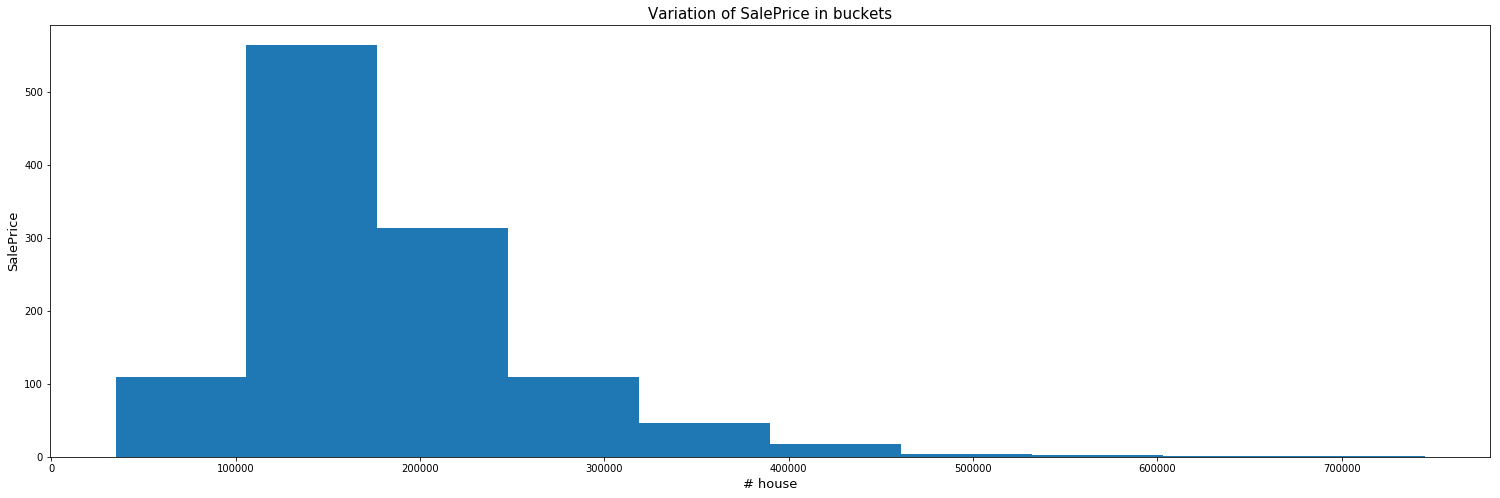

In [36]:
#Visualize the trend of Sale Price
train_set_SalePrice = train_set.iloc[:,-1:]

fig, ax2 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=0.5, hspace=0.5)

ax2.set_title('Variation of SalePrice in buckets', fontsize=15)
ax2.set_xlabel('# house', fontsize=13)
ax2.set_ylabel('SalePrice', fontsize=13)
ax2.hist(train_set_SalePrice['SalePrice'])

plt.show()

__Observations__ :
-  There is no pattern in the SalePrice over time
-  Majority of SalePrice falls between 100000 to 180000 $

### Check for normality of target variable

In statistics, __normality__ tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

__Skewness__ is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Skewness in a data series may sometimes be observed not only graphically but by simple inspection of the values. For instance, consider the numeric sequence (49, 50, 51), whose values are evenly distributed around a central value of 50. We can transform this sequence into a negatively skewed distribution by adding a value far below the mean, e.g. (40, 49, 50, 51). Similarly, we can make the sequence positively skewed by adding a value far above the mean, e.g. (49, 50, 51, 60). __Lesser the skewness, more normally distributed the dataset is.__

__Kurtosis__ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


 mu = 181441.54 and sigma = 77230.50



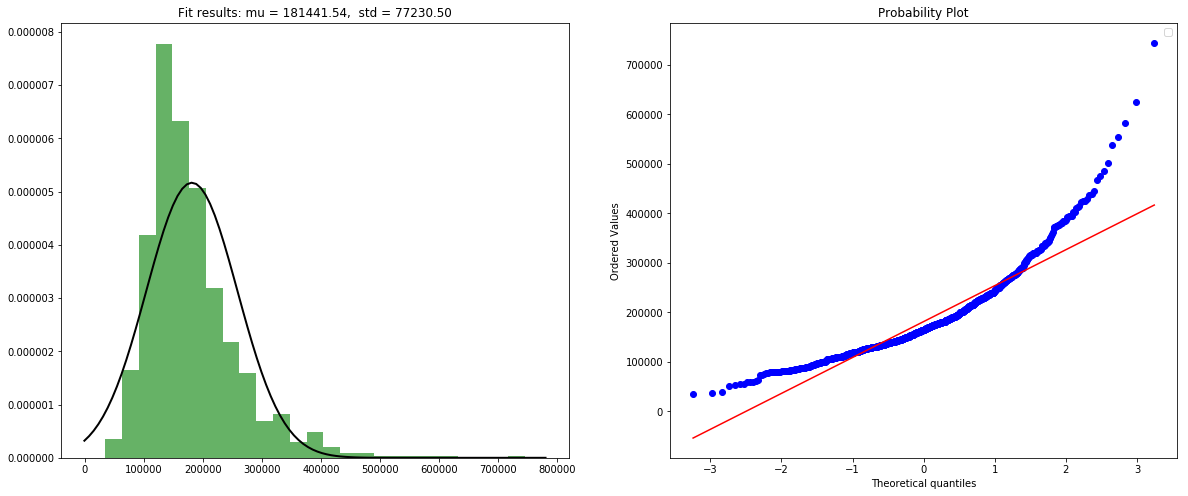

Skewness: 1.743129
Kurtosis: 5.475315


In [37]:
data = train_set['SalePrice']
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

''' 
An informal approach to testing normality 
is to compare a histogram of the sample data to a normal probability curve.
'''
ax1.hist(data, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.set_title(title)


'''
A better way to visualize test for normality is Normal probability plot
In a normal probability plot (also called a "normal plot"), the sorted data are plotted 
vs. values selected to make the resulting image look close to a straight line if the data 
are approximately normally distributed. Deviations from a straight line suggest departures from normality. 
'''
(mu, sigma) = norm.fit(train_set['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
ax2.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax2.set_ylabel('Frequency')
ax2.set_title('SalePrice distribution')
stats.probplot(train_set['SalePrice'], plot=ax2)

plt.show()


print("Skewness: %f" % train_set['SalePrice'].skew())
print("Kurtosis: %f" % train_set['SalePrice'].kurt())

__Observations :__
-  Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution.
-  Both the value of Skewness & Kurtosis are high, it doesn't represent a normal distribution. For normal distribution, the Skewness is below 1 & Kurtosis below 3.

__The above test are visual test for normality, Below are few more test that can be done to test for normal distribution:- __

1. D'Agostino's K-squared test,
2. Jarque–Bera test,
3. Anderson–Darling test,
4. Cramér–von Mises criterion,
5. Lilliefors test,
6. Kolmogorov–Smirnov test,
7. __Shapiro–Wilk test :__  The Shapiro-Wilk test, proposed in 1965, calculates a W statistic that tests whether a random sample, x1,x2,…,xn comes from (specifically) a normal distribution . Small values of W are evidence of departure from normality

8. Pearson's chi-squared test
9. __Anderson–Darling__ : The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing whether a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality. _If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references._

In [38]:
#Shapiro–Wilk test
stats.shapiro(train_set['SalePrice'])

(0.8810798525810242, 5.497511655767464e-29)

In [39]:
#Anderson–Darling test
stats.anderson(train_set['SalePrice'], dist='norm')

AndersonResult(statistic=31.358053701054814, critical_values=array([ 0.574,  0.654,  0.784,  0.915,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

__Observation :__

-  When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis. The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue.
    -  A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    -  A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
-  Based on the p value from Shapiro–Wilk test (3.206247534576162e-33), the null hypothesis is rejected as 3.206247534576162e-33 not greater than 0.5. This data doesn't belong from a normal distribution.
-  Based on the test statistics of Anderson–Darling test, we can see that the statistic is way more than the critical_values for any significance_level, so the hypotheis is rejected. The data set is not from normal distribution.

__The Target variable is not normally distributed, which necessarily doesn't mean we need to normalize the datset, will decide based on error distribution__

## Data preparation

### Data Cleaning - Handling Missing Values

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them.

__Analyze the frequency of null/nan values__

In [40]:
#Columsn with null/NAN values
train_set_nan_freq = train_set.isnull().sum().to_frame()
train_set_nan_freq['nan_frequency'] = (train_set_nan_freq[0]/train_set.shape[0])*100
train_set_nan_freq.sort_values(by=['nan_frequency'], ascending=False)

,0,nan_frequency
PoolQC,1162,99.486301
MiscFeature,1122,96.061644
Alley,1094,93.664384
Fence,935,80.051370
FireplaceQu,547,46.832192
LotFrontage,217,18.578767
GarageYrBlt,64,5.479452
GarageCond,64,5.479452
GarageType,64,5.479452
GarageFinish,64,5.479452


Now we have to anlyse each and every column to fset missing values.

In [41]:
columns_with_nan = train_set_nan_freq.loc[train_set_nan_freq['nan_frequency']>0].index.tolist()
columns_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [42]:
for col in columns_with_nan:
    print("----- Column/Feature Name -----", col)
    if train_set[col].dtypes=='object' :
        print(train_set[col].describe())
    elif train_set[col].dtypes=='int64' or train_set[col].dtypes=='float64' :
        print(train_set[col].describe())

----- Column/Feature Name ----- LotFrontage
count    951.000000
mean      70.343849
std       24.897021
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64
----- Column/Feature Name ----- Alley
count       74
unique       2
top       Grvl
freq        44
Name: Alley, dtype: object
----- Column/Feature Name ----- MasVnrType
count     1162
unique       4
top       None
freq       677
Name: MasVnrType, dtype: object
----- Column/Feature Name ----- MasVnrArea
count    1162.000000
mean      103.771945
std       173.032238
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1378.000000
Name: MasVnrArea, dtype: float64
----- Column/Feature Name ----- BsmtQual
count     1140
unique       4
top         TA
freq       521
Name: BsmtQual, dtype: object
----- Column/Feature Name ----- BsmtCond
count     1140
unique       4
top         TA
freq      1045
Name: BsmtCond, dtype: obj

Inference of missing values:-
1. FireplaceQu - Set to most occurance category __Gd__ 
2. LotFrontage - Set to mean of __70.343849__
3. GarageType - Set to most occurance category __Attchd__  
4. GarageYrBlt - Set to mean of __1978.662138__ 
5. GarageFinish - Set to most occurance category __Unf__
6. GarageQual - Set to most occurance category __TA__  
7. GarageCond - Set to most occurance category __TA__  
8. BsmtExposure - Set to most occurance category __No__
9. BsmtQual - Set to most occurance category __TA__    
10. BsmtCond - Set to most occurance category __TA__    
11. BsmtFinType1 - Set to most occurance category __Unf__
12. BsmtFinType2 - Set to most occurance category __Unf__
13. MasVnrArea - Set to mean of __103.771945__
14. MasVnrType - Set to most occurance category __None__
16. Electrical - Set to most occurance category __SBrkr__
17. PoolQC - __Drop__, too many null values
18. MiscFeature - __Drop__, too many null values
19. Alley - __Drop__, too many null values
20. Fence - __Drop__, too many null values

__The missing categorical(String) values can be handles in following ways:- __
1. Replace with the most common value for the feature.
2. Replace with Unknown, which will also become a new category.
3. Consider the rows that have the value as training set & the ones not having the value as test set. Then train a KNN to find the missing value.

__The missing numeric values can be handles in following ways:- __
1. Mean
2. SD
3. Replace with the most common value for the feature.

In [43]:
#Dropping above columns from dataset.
train_set.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Impute Missing Values

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

In [44]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
    
train_set_with_nan = train_set[['LotFrontage','GarageYrBlt','MasVnrArea',
                                        'FireplaceQu','GarageType','GarageFinish',
                                        'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                                        'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]   
train_set_without_nan = DataFrameImputer().fit_transform(train_set_with_nan)


#Remove imputed columns from train set
train_set.drop(['LotFrontage','GarageYrBlt','MasVnrArea','FireplaceQu','GarageType','GarageFinish',
                'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical'], axis=1, inplace=True)

#Concate same coulmns with imputed values
train_set_imputed = pd.concat([train_set,train_set_without_nan],axis=1)

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
#Verify that missing values are taken care off : Columsn with null/NAN values
train_set_imputed_freq = train_set_imputed.isnull().sum().to_frame()
train_set_imputed_freq['nan_frequency'] = (train_set_imputed_freq[0]/train_set_imputed_freq.shape[0])*100
train_set_imputed_freq.sort_values(by=['nan_frequency'], ascending=False)

,0,nan_frequency
Id,0,0.0
PavedDrive,0,0.0
MiscVal,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0
OpenPorchSF,0,0.0
WoodDeckSF,0,0.0
GarageArea,0,0.0


__All nan values in data is taken care by diffent strategies__

### Prepare Test dataset

In [46]:
#Dropping above columns from dataset.
test_set.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

test_set_with_nan = test_set[['LotFrontage','GarageYrBlt','MasVnrArea',
                                        'FireplaceQu','GarageType','GarageFinish',
                                        'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                                        'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]   
test_set_without_nan = DataFrameImputer().fit_transform(test_set_with_nan)


#Remove imputed columns from train set
test_set.drop(['LotFrontage','GarageYrBlt','MasVnrArea','FireplaceQu','GarageType','GarageFinish',
                'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical'], axis=1, inplace=True)

#Concate same coulmns with imputed values
test_set_imputed = pd.concat([test_set,test_set_without_nan],axis=1)
print(test_set_imputed.shape)

(292, 77)


/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Handling Text and Categorical Attributes

#### Convert non-nonumeric attributes to numeric representation

This involves following Options:

1. __Integer Encoding__
    - As a first step, each unique category value is assigned an integer value. 
    - For example, “red” is 1, “green” is 2, and “blue” is 3.
    - This is called a label encoding or an integer encoding and is easily reversible.
    - For some variables, this may be enough.
    - The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
    - For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient.
    - But this process is not widely used.
2. __One-Hot Encoding__
    - For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.
    - In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).
    - In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.
    - __OneHotEncoder__ cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.
    - __You need two steps:__
        1. Use LabelEncoder to encode your string variables to integers
        2. Then use OneHotEncoder on your integer variables
    - __pandas.get_dummies__ is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.

3. __Frequency-based encoding__
    - Using this method, the occurrence frequency is calculated for each class out of the total classes. The corresponding relative frequency is assigned as encoded values for the classes.
4. __Target mean encoding__
    - It can only be used for supervised machine learning problem where there is a target or response attribute. Each class of the categorical input attribute is encoded as a function of the mean of the target.
5. __Binary encoding__
    - The classes are first converted to the numeric format, and then they are converted to their equivalent binary strings. The binary digits are then split into separate columns.
6. __Hash encoding__
    - This method is also popularly known as feature hashing. A hash function is used to map data to a number. This method may map different classes to the same bucket, but is useful when there are hundreds of classes/categories present for an attribute.
    

In [47]:
#Divide the train & test dataset into dependent & independent variable
housing_X_train = train_set_imputed.drop(['SalePrice'], axis=1)
housing_y_train = train_set_imputed[['SalePrice']]

housing_X_test = test_set_imputed.drop(['SalePrice'], axis=1)
housing_y_test = test_set_imputed[['SalePrice']]

print(housing_X_train.shape)
print(housing_X_test.shape)

(1168, 76)
(292, 76)


In [48]:
#Features with object datatypes
housing_data_object_column = housing_X_train.select_dtypes(include=['object']).columns.tolist()
housing_data_object_column

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'Electrical']

##### Label encoding : Convert string to integer

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in housing_X_train.columns.values:
    # Encoding only categorical variables
    if housing_X_train[col].dtypes=='object':        
        # Using whole data to form an exhaustive list of levels
        data=housing_X_train[col].append(housing_X_test[col])
        #data=housing_X_train[col]
        le.fit(data.values)
        housing_X_train[col]=le.transform(housing_X_train[col])
        housing_X_test[col]=le.transform(housing_X_test[col])
        
housing_X_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,GarageYrBlt,MasVnrArea,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,MasVnrType,Electrical
254,255,20,3,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1957,1,1,8,8,3,2,1,922,0,392,1314,1,4,1,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,1,294,2,250,0,0,0,0,0,0,6,2010,8,4,70.000000,1957.000000,0.000000,2,1,1,4,4,3,3,3,4,5,2,4
1066,1067,60,3,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1993,1994,1,1,12,13,2,4,2,0,0,799,799,1,2,1,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,2,380,2,0,40,0,0,0,0,0,5,2009,8,4,59.000000,1993.000000,0.000000,4,1,1,4,4,3,2,3,5,5,2,4
638,639,30,3,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1910,1950,1,1,8,14,3,4,1,0,0,796,796,1,2,1,796,0,0,796,0,0,1,0,2,1,3,4,6,0,0,0,1,328,0,164,0,0,0,0,5,2008,8,4,67.000000,1978.662138,0.000000,2,1,2,4,4,3,1,3,5,5,2,0
799,800,50,3,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1937,1950,1,1,13,14,3,4,0,569,0,162,731,1,0,1,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,1,240,2,0,0,264,0,0,0,0,6,2007,8,4,60.000000,1939.000000,252.000000,4,5,2,4,4,3,2,3,0,5,1,4
380,381,50,3,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1924,1950,1,1,3,14,3,4,0,218,0,808,1026,1,4,1,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,1,308,2,0,0,242,0,0,0,0,5,2010,8,4,50.000000,1924.000000,0.000000,2,5,2,4,4,3,3,3,3,5,2,4
303,304,20,3,9800,1,3,3,0,0,0,5,2,2,0,2,5,7,1972,1972,1,1,12,13,3,4,2,894,0,0,894,1,4,1,894,0,0,894,1,0,1,0,3,1,3,5,6,0,2,552,2,256,0,0,0,0,0,0,7,2006,8,0,70.000000,1975.000000,0.000000,2,1,2,4,4,3,3,3,0,5,2,4
86,87,60,3,11911,1,1,3,0,4,0,8,2,2,0,5,6,5,2005,2005,1,1,12,13,2,4,2,0,0,684,684,1,0,1,684,876,0,1560,0,0,2,1,3,1,2,6,6,1,2,400,2,100,38,0,0,0,0,0,3,2009,8,4,122.000000,2005.000000,0.000000,2,3,0,4,4,0,2,3,5,5,2,4
1385,1386,50,4,5436,1,3,3,0,4,0,9,2,2,0,0,4,8,1922,2007,1,1,12,13,3,2,0,735,0,61,796,1,2,1,796,358,0,1154,1,0,1,0,3,1,2,7,6,0,1,240,0,0,96,0,0,0,0,0,5,2010,8,4,40.000000,1922.000000,0.000000,2,5,2,4,4,3,3,3,1,5,2,4
265,266,20,3,12090,1,0,3,0,4,0,14,2,2,0,2,6,6,1981,1981,1,1,8,8,3,2,1,588,228,606,1422,1,4,1,1422,0,0,1422,0,0,2,0,3,1,2,7,6,1,2,576,2,276,0,0,0,0,0,0,6,2008,8,4,78.000000,1981.000000,210.000000,4,1,0,4,4,3,2,3,2,3,1,4
793,794,20,3,9158,1,3,3,0,4,0,21,2,2,0,2,8,5,2007,2007,1,1,5,5,2,4,2,0,0,1496,1496,1,0,1,1496,0,0,1496,0,0,2,0,3,1,2,7,6,0,2,474,2,168,130,0,0,0,0,0,6,2007,6,5,76.000000,2007.000000,140.000000,2,1,0,4,4,0,2,3,5,5,3,4


##### One-Hot Encoding : Integer to binary representation

The attributes that were of Object types has was label encodes & now needs to be one-hot encoded.

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

enc=OneHotEncoder(sparse=False)

housing_X_train_1=housing_X_train
housing_X_test_1=housing_X_test

columns=housing_data_object_column

for col in columns:
    # creating an exhaustive list of all possible categorical values
    data=housing_X_train[[col]].append(housing_X_test[[col]])
    #data=housing_X_train[[col]]
    enc.fit(data)

    # Fitting One Hot Encoding on train data
    temp = enc.transform(housing_X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])    
    
    # In side by side concatenation index values should be same
    # Setting the index values similar to the housing_X_train data frame
    temp=temp.set_index(housing_X_train.index.values)

    # adding the new One Hot Encoded varibales to the train data frame
    housing_X_train_1=pd.concat([housing_X_train_1,temp],axis=1)
    housing_X_train_1.drop(col,axis=1,inplace=True)


    # Fitting One Hot Encoding on test data
    temp = enc.transform(housing_X_test[[col]])
    #Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])

    # In side by side concatenation index values should be same
    # Setting the index values similar to the housing_X_test data frame
    temp=temp.set_index(housing_X_test.index.values)

    # adding the new One Hot Encoded varibales to the test data frame
    housing_X_test_1=pd.concat([housing_X_test_1,temp],axis=1)
    housing_X_test_1.drop(col,axis=1,inplace=True)

In [51]:
housing_X_train_1.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,MSZoning_3,MSZoning_4,MSZoning_1,MSZoning_2,MSZoning_0,Street_1,Street_0,LotShape_3,LotShape_0,LotShape_1,LotShape_2,LandContour_3,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_4,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_12,Neighborhood_5,Neighborhood_17,Neighborhood_7,Neighborhood_21,Neighborhood_8,Neighborhood_16,Neighborhood_19,Neighborhood_14,Neighborhood_20,Neighborhood_3,Neighborhood_6,Neighborhood_11,Neighborhood_15,Neighborhood_23,Neighborhood_9,Neighborhood_4,Neighborhood_18,Neighborhood_22,Neighborhood_0,Neighborhood_10,Neighborhood_2,Neighborhood_24,Neighborhood_13,Neighborhood_1,Condition1_2,Condition1_1,Condition1_0,Condition1_6,Condition1_4,Condition1_5,Condition1_3,Condition1_8,Condition1_7,Condition2_2,Condition2_1,Condition2_7,Condition2_4,Condition2_0,Condition2_6,Condition2_5,Condition2_3,BldgType_0,BldgType_4,BldgType_2,BldgType_3,BldgType_1,HouseStyle_2,HouseStyle_5,HouseStyle_0,HouseStyle_7,HouseStyle_6,HouseStyle_1,HouseStyle_4,HouseStyle_3,RoofStyle_1,RoofStyle_3,RoofStyle_0,RoofStyle_2,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_5,RoofMatl_7,RoofMatl_6,RoofMatl_4,RoofMatl_3,RoofMatl_2,RoofMatl_0,Exterior1st_12,Exterior1st_6,Exterior1st_8,Exterior1st_13,Exterior1st_9,Exterior1st_5,Exterior1st_3,Exterior1st_14,Exterior1st_11,Exterior1st_0,Exterior1st_10,Exterior1st_2,Exterior1st_7,Exterior1st_4,Exterior1st_1,Exterior2nd_13,Exterior2nd_8,Exterior2nd_6,Exterior2nd_14,Exterior2nd_10,Exterior2nd_5,Exterior2nd_15,Exterior2nd_12,Exterior2nd_3,Exterior2nd_0,Exterior2nd_7,Exterior2nd_2,Exterior2nd_11,Exterior2nd_1,Exterior2nd_9,Exterior2nd_4,ExterQual_3,ExterQual_2,ExterQual_0,ExterQual_1,ExterCond_4,ExterCond_2,ExterCond_1,ExterCond_0,ExterCond_3,Foundation_2,Foundation_1,Foundation_0,Foundation_3,Foundation_4,Foundation_5,Heating_1,Heating_2,Heating_3,Heating_5,Heating_4,Heating_0,HeatingQC_0,HeatingQC_4,HeatingQC_2,HeatingQC_1,HeatingQC_3,CentralAir_1,CentralAir_0,KitchenQual_3,KitchenQual_2,KitchenQual_0,KitchenQual_1,Functional_6,Functional_3,Functional_2,Functional_4,Functional_0,Functional_1,Functional_5,PavedDrive_2,PavedDrive_0,PavedDrive_1,SaleType_8,SaleType_6,SaleType_0,SaleType_3,SaleType_5,SaleType_4,SaleType_1,SaleType_7,SaleType_2,SaleCondition_4,SaleCondition_5,SaleCondition_0,SaleCondition_3,SaleCondition_2,SaleCondition_1,FireplaceQu_2,FireplaceQu_4,FireplaceQu_1,FireplaceQu_0,FireplaceQu_3,GarageType_1,GarageType_5,GarageType_3,GarageType_2,GarageType_4,GarageType_0,GarageFinish_2,GarageFinish_1,GarageFinish_0,GarageQual_4,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_0,GarageCond_4,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_0,BsmtExposure_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtQual_3,BsmtQual_2,BsmtQual_0,BsmtQual_1,BsmtCond_3,BsmtCond_1,BsmtCond_0,BsmtCond_2,BsmtFinType1_5,BsmtFinType1_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_4,BsmtFinType1_3,BsmtFinType2_5,BsmtFinType2_4,BsmtFinType2_3,BsmtFinType2_1,BsmtFinType2_0,BsmtFinType2_2,MasVnrType_2,MasVnrType_1,MasVnrType_3,MasVnrType_0,Electrical_4,Electrical_0,Electrical_1,Electrical_2,Electrical_3
254,255,20,8400,5,6,1957,1957,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1,294,250,0,0,0,0,0,0,6,2010,70.0,1957.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [52]:
housing_X_test_1.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,MSZoning_3,MSZoning_4,MSZoning_1,MSZoning_2,MSZoning_0,Street_1,Street_0,LotShape_3,LotShape_0,LotShape_1,LotShape_2,LandContour_3,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_4,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_12,Neighborhood_5,Neighborhood_17,Neighborhood_7,Neighborhood_21,Neighborhood_8,Neighborhood_16,Neighborhood_19,Neighborhood_14,Neighborhood_20,Neighborhood_3,Neighborhood_6,Neighborhood_11,Neighborhood_15,Neighborhood_23,Neighborhood_9,Neighborhood_4,Neighborhood_18,Neighborhood_22,Neighborhood_0,Neighborhood_10,Neighborhood_2,Neighborhood_24,Neighborhood_13,Neighborhood_1,Condition1_2,Condition1_1,Condition1_0,Condition1_6,Condition1_4,Condition1_5,Condition1_3,Condition1_8,Condition1_7,Condition2_2,Condition2_1,Condition2_7,Condition2_4,Condition2_0,Condition2_6,Condition2_5,Condition2_3,BldgType_0,BldgType_4,BldgType_2,BldgType_3,BldgType_1,HouseStyle_2,HouseStyle_5,HouseStyle_0,HouseStyle_7,HouseStyle_6,HouseStyle_1,HouseStyle_4,HouseStyle_3,RoofStyle_1,RoofStyle_3,RoofStyle_0,RoofStyle_2,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_5,RoofMatl_7,RoofMatl_6,RoofMatl_4,RoofMatl_3,RoofMatl_2,RoofMatl_0,Exterior1st_12,Exterior1st_6,Exterior1st_8,Exterior1st_13,Exterior1st_9,Exterior1st_5,Exterior1st_3,Exterior1st_14,Exterior1st_11,Exterior1st_0,Exterior1st_10,Exterior1st_2,Exterior1st_7,Exterior1st_4,Exterior1st_1,Exterior2nd_13,Exterior2nd_8,Exterior2nd_6,Exterior2nd_14,Exterior2nd_10,Exterior2nd_5,Exterior2nd_15,Exterior2nd_12,Exterior2nd_3,Exterior2nd_0,Exterior2nd_7,Exterior2nd_2,Exterior2nd_11,Exterior2nd_1,Exterior2nd_9,Exterior2nd_4,ExterQual_3,ExterQual_2,ExterQual_0,ExterQual_1,ExterCond_4,ExterCond_2,ExterCond_1,ExterCond_0,ExterCond_3,Foundation_2,Foundation_1,Foundation_0,Foundation_3,Foundation_4,Foundation_5,Heating_1,Heating_2,Heating_3,Heating_5,Heating_4,Heating_0,HeatingQC_0,HeatingQC_4,HeatingQC_2,HeatingQC_1,HeatingQC_3,CentralAir_1,CentralAir_0,KitchenQual_3,KitchenQual_2,KitchenQual_0,KitchenQual_1,Functional_6,Functional_3,Functional_2,Functional_4,Functional_0,Functional_1,Functional_5,PavedDrive_2,PavedDrive_0,PavedDrive_1,SaleType_8,SaleType_6,SaleType_0,SaleType_3,SaleType_5,SaleType_4,SaleType_1,SaleType_7,SaleType_2,SaleCondition_4,SaleCondition_5,SaleCondition_0,SaleCondition_3,SaleCondition_2,SaleCondition_1,FireplaceQu_2,FireplaceQu_4,FireplaceQu_1,FireplaceQu_0,FireplaceQu_3,GarageType_1,GarageType_5,GarageType_3,GarageType_2,GarageType_4,GarageType_0,GarageFinish_2,GarageFinish_1,GarageFinish_0,GarageQual_4,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_0,GarageCond_4,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_0,BsmtExposure_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtQual_3,BsmtQual_2,BsmtQual_0,BsmtQual_1,BsmtCond_3,BsmtCond_1,BsmtCond_0,BsmtCond_2,BsmtFinType1_5,BsmtFinType1_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_4,BsmtFinType1_3,BsmtFinType2_5,BsmtFinType2_4,BsmtFinType2_3,BsmtFinType2_1,BsmtFinType2_0,BsmtFinType2_2,MasVnrType_2,MasVnrType_1,MasVnrType_3,MasVnrType_0,Electrical_4,Electrical_0,Electrical_1,Electrical_2,Electrical_3
892,893,20,8414,6,8,1963,2003,663,0,396,1059,1068,0,0,1068,0,1,1,0,3,1,6,0,1,264,192,0,0,0,0,0,0,2,2006,70.0,1963.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

__Slice out only one hot encoded features__

In [53]:
onehot_housing_X_train_1 = housing_X_train_1.loc[:,'MSZoning_3':]
onehot_housing_X_test_1 = housing_X_test_1.loc[:,'MSZoning_3':]

non_onehot_housing_X_train_1 = housing_X_train_1.loc[:,:'MasVnrArea']
non_onehot_housing_X_test_1 = housing_X_test_1.loc[:,:'MasVnrArea']

print(housing_X_train_1.shape)
print(onehot_housing_X_train_1.shape)
print(non_onehot_housing_X_train_1.shape)

print(housing_X_test_1.shape)
print(onehot_housing_X_test_1.shape)
print(non_onehot_housing_X_test_1.shape)

(1168, 276)
(1168, 239)
(1168, 37)
(292, 276)
(292, 239)
(292, 37)


The number of features are very high now, there are two ways to handle it next:-
1. __Dimention reduction__- Reduce number of features:
    - Principal component analysis (PCA)
    - Truncated singular value decomposition (TSVD)
2. Implement an algorithm, that can handle sparse dataset.

##### Dimention reduction : Implement PCA 

In [54]:
#Reduce the dimention of the encoded variable
num_encoded_variable = len(columns)
pca = PCA(n_components=num_encoded_variable)
onehot_housing_X_train_1_pca = pca.fit(onehot_housing_X_train_1).transform(onehot_housing_X_train_1)
print(onehot_housing_X_train_1_pca.shape)

onehot_housing_X_test_1_pca = pca.transform(onehot_housing_X_test_1)
print(onehot_housing_X_test_1_pca.shape)


(1168, 39)
(292, 39)


In [55]:
#Append back to the original train dataset.
onehot_housing_X_train_1_pca_temp = pd.DataFrame(onehot_housing_X_train_1_pca,columns=[("ohe_"+str(i)) for i in range(num_encoded_variable)])
onehot_housing_X_train_1_pca_temp=onehot_housing_X_train_1_pca_temp.set_index(non_onehot_housing_X_train_1.index.values)
onehot_housing_X_train_pca = pd.concat([non_onehot_housing_X_train_1,onehot_housing_X_train_1_pca_temp],axis=1)
print(onehot_housing_X_train_pca.shape)


#Append back to the original train dataset.
onehot_housing_X_test_1_pca_temp = pd.DataFrame(onehot_housing_X_test_1_pca,columns=[("ohe_"+str(i)) for i in range(num_encoded_variable)])
onehot_housing_X_test_1_pca_temp=onehot_housing_X_test_1_pca_temp.set_index(non_onehot_housing_X_test_1.index.values)
onehot_housing_X_test_pca = pd.concat([non_onehot_housing_X_test_1,onehot_housing_X_test_1_pca_temp],axis=1)
print(onehot_housing_X_test_pca.shape)



(1168, 76)
(292, 76)


In [56]:
onehot_housing_X_train_pca.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
254,255,20,8400,5,6,1957,1957,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1,294,250,0,0,0,0,0,0,6,2010,70.0,1957.000000,0.0,-1.468621,-0.703183,0.698869,-0.417235,-0.942351,-0.100231,-0.341157,0.613718,-0.027673,1.024968,-0.560283,0.377343,-0.688672,0.038065,0.347465,0.133728,-0.106524,-0.165203,0.525093,-0.282733,0.280332,0.328906,1.023212,0.210813,-0.408299,0.376032,0.328456,-0.180611,0.120875,-0.504379,-0.406924,-0.120166,0.134894,0.480846,-0.043343,-0.027258,-0.024372,0.031956,-0.202560
1066,1067,60,7837,6,7,1993,1994,0,0,799,799,799,772,0,1571,0,0,2,1,3,1,7,1,2,380,0,40,0,0,0,0,0,5,2009,59.0,1993.000000,0.0,1.254291,0.083622,-1.612943,-0.191824,-0.190980,-1.212923,0.244699,-0.433646,0.155787,0.619365,-0.602976,-0.505189,-0.306224,0.144447,0.529405,0.407253,0.252683,0.242554,-0.510931,0.477616,-0.013428,0.357536,0.628467,-0.060455,0.354197,-0.359676,0.831452,0.370070,0.047328,0.103643,0.083823,-0.212395,0.043290,0.140891,0.142993,-0.110183,0.082296,-0.103690,-0.112509
638,639,30,8777,5,7,1910,1950,0,0,796,796,796,0,0,796,0,0,1,0,2,1,4,0,0,0,328,0,164,0,0,0,0,5,2008,67.0,1978.662138,0.0,-1.531997,0.369517,0.354896,0.044107,-0.539848,-0.570525,-0.151709,-0.503162,0.613897,0.327886,-0.312200,-0.264748,-0.593382,-0.244649,0.018366,0.063725,1.013624,-0.578326,0.107748,0.263337,0.083066,-0.040633,-0.326246,0.348912,1.303316,0.132572,-0.205014,0.336256,-0.274728,-0.224520,-0.073355,0.259556,0.349748,-0.456265,-0.496368,0.442005,0.184075,-0.033925,-0.462766
799,800,50,7200,5,7,1937,1950,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1,240,0,0,264,0,0,0,0,6,2007,60.0,1939.000000,252.0,-0.373957,0.394167,-1.110093,-0.218168,0.473907,0.191664,-1.199147,-0.048986,0.086227,-0.941303,0.791293,0.826953,0.307038,1.107505,-0.833136,-0.959809,0.689346,0.335138,0.416136,0.109832,0.471397,-0.371019,-0.819937,-0.144644,0.406902,0.279026,-0.612621,0.519490,-0.505548,0.235976,-0.594554,0.508710,-0.591483,0.000605,0.286944,-0.092409,-0.000342,-0.339486,0.222996
380,381,50,5000,5,6,1924,1950,218,0,808,1026,1026,665,0,1691,0,0,2,0,3,1,6,1,1,308,0,0,242,0,0,0,0,5,2010,50.0,1924.000000,0.0,-1.371717,1.013104,-0.148474,-0.033651,-0.345363,0.362426,-0.438437,0.088405,-0.036499,-0.256434,-0.161059,0.113820,1.108683,0.123071,-0.250447,-0.446642,0.067376,-0.322494,0.252757,0.323513,-0.037540,0.078985,0.386045,-0.705062,-0.432016,0.073277,-0.549556,0.038133,0.240492,0.534527,-0.307384,0.388226,-0.654874,0.117579,0.252112,0.077451,0.192134,-0.478601,0.092686


In [57]:
onehot_housing_X_test_pca.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
892,893,20,8414,6,8,1963,2003,663,0,396,1059,1068,0,0,1068,0,1,1,0,3,1,6,0,1,264,192,0,0,0,0,0,0,2,2006,70.0,1963.0,0.0,-1.071674,-1.268156,0.860577,-0.424631,-0.211231,-0.130908,0.028009,-0.157508,0.322313,0.125784,0.112232,-0.183095,0.524080,-0.772389,1.133733,0.389915,-0.423670,0.540938,0.602923,0.523597,-0.359822,0.145457,0.298654,-0.062127,0.042219,0.403278,-0.047219,-0.295655,0.421774,0.037965,-0.527743,-0.219045,-0.178752,0.105468,-0.240268,0.308817,-0.326077,-0.055707,-0.005330
1105,1106,60,12256,8,5,1994,1995,1032,0,431,1463,1500,1122,0,2622,1,0,2,1,3,1,9,2,2,712,186,32,0,0,0,0,0,4,2010,98.0,1994.0,362.0,1.830919,-1.137531,-1.238341,0.132878,0.730273,0.760980,-0.154630,0.719158,0.368302,-0.987994,-0.051680,0.673992,-0.121825,-0.377793,0.209694,-0.439172,0.176900,0.475156,0.463302,0.223518,-1.159021,-0.222636,0.251149,-0.246473,-0.038256,-0.375166,0.387839,-0.005143,-0.005098,-0.106900,-0.028696,-0.190812,0.134219,-0.067473,-0.014690,0.115998,0.102154,0.116224,0.098054
413,414,30,8960,5,6,1927,1950,0,0,1008,1008,1028,0,0,1028,0,0,1,0,2,1,5,1,2,360,0,0,130,0,0,0,0,3,2010,56.0,1927.0,0.0,-2.001723,1.114377,0.290602,-0.142687,-0.124120,-0.232311,-0.027823,0.036006,0.021164,-0.004457,0.103096,-0.248906,-0.299902,-0.270835,-0.314234,0.293606,0.299425,0.379076,-0.829426,0.585310,-0.034826,-0.164212,0.038095,-0.097690,0.748991,0.441081,-0.435901,0.075445,0.250329,-0.228513,0.042348,-0.127299,0.896393,-0.422959,-0.157825,-0.007723,0.657703,-0.325222,-0.162589
522,523,50,5000,6,7,1947,1950,399,0,605,1004,1004,660,0,1664,0,0,2,0,3,1,7,2,2,420,0,24,36,0,0,0,0,10,2006,50.0,1950.0,0.0,-1.754032,0.892785,-0.224411,0.317996,0.084541,0.219265,-0.315324,0.334133,-0.624000,0.001981,0.683377,1.294272,-0.470351,-0.244366,-0.544965,0.039735,-0.639127,0.956915,0.159062,-0.755464,0.401767,-0.418210,-0.255832,-0.099480,0.600447,0.474046,-0.311782,0.389449,0.247145,-0.000342,-0.768192,-0.093452,-0.010325,-0.195994,0.256592,-0.710534,0.358032,-0.094340,-0.340998
1036,1037,20,12898,9,5,2007,2008,1022,0,598,1620,1620,0,0,1620,1,0,2,0,2,1,6,1,3,912,228,0,0,0,0,0,0,9,2009,89.0,2008.0,70.0,2.039851,-0.671902,1.015745,1.250843,0.919012,0.471206,-0.370614,-1.072792,-0.483080,0.183625,-0.391413,-0.539901,-0.083288,-0.148942,0.036937,0.084278,-0.342312,-0.082892,-0.230455,0.395786,-0.351519,-0.474410,0.208060,-0.285874,-0.068636,0.248589,0.518522,0.601635,0.483262,-0.214606,0.144112,0.138703,0.181656,0.393313,-0.029080,-0.219138,-0.109937,-0.107119,-0.198858


### Feature Scaling

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

__There are four common methods to perform Feature Scaling :-__
1. Standardisation
    - Standardisation replaces the values by their Z scores. This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.
2. Mean Normalisation
    - This distribution will have values between -1 and 1with μ=0
3. Min-Max Scaling
    - This scaling brings the value between 0 and 1.
4. Unit Vector
    - Scaling is done considering the whole feature vecture to be of unit length.
    
Min-Max Scaling and Unit Vector techniques produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.


__When to Scale ?__
Rule of thumb is any algorithm that computes distance or assumes normality, scale your features!!!

Some examples of algorithms where feature scaling matters are:
1. k-nearest neighbors
2. PCA
3. We can speed up gradient descent by scaling.
4. Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
5. Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

__There is no clear argument to state if feature scaling makes scense on one hot encoded data, so we will start with NOT scaling the one hot encoded feature. If the prediction doesnt perform well, will scale the same to cature if any improvement.__

In [58]:
#Non one hot encoded features
non_one_hot_encoded_features_housing_X_train = onehot_housing_X_train_pca.loc[:,:'MasVnrArea']

#one hot encoded features
one_hot_encoded_features_housing_X_train = onehot_housing_X_train_pca.loc[:,'ohe_0':]

scaler = StandardScaler()
std_scaler = scaler.fit(non_one_hot_encoded_features_housing_X_train)
non_one_hot_encoded_features_std_scaler_housing_X_train = std_scaler.transform(non_one_hot_encoded_features_housing_X_train)
non_one_hot_encoded_features_std_scaler_housing_X_train_temp = pd.DataFrame(non_one_hot_encoded_features_std_scaler_housing_X_train,columns=non_one_hot_encoded_features_housing_X_train.columns)
non_one_hot_encoded_features_std_scaler_housing_X_train_temp=non_one_hot_encoded_features_std_scaler_housing_X_train_temp.set_index(non_one_hot_encoded_features_housing_X_train.index.values)

#Concat with one hot encoded features
housing_X_train_scaled = pd.concat([non_one_hot_encoded_features_std_scaler_housing_X_train_temp, one_hot_encoded_features_housing_X_train],axis=1)





#Non one hot encoded features
non_one_hot_encoded_features_housing_X_test = onehot_housing_X_test_pca.loc[:,:'MasVnrArea']

#one hot encoded features
one_hot_encoded_features_housing_X_test = onehot_housing_X_test_pca.loc[:,'ohe_0':]

non_one_hot_encoded_features_std_scaler_housing_X_test = std_scaler.transform(non_one_hot_encoded_features_housing_X_test)
non_one_hot_encoded_features_std_scaler_housing_X_test_temp = pd.DataFrame(non_one_hot_encoded_features_std_scaler_housing_X_test,columns=non_one_hot_encoded_features_housing_X_test.columns)
non_one_hot_encoded_features_std_scaler_housing_X_test_temp=non_one_hot_encoded_features_std_scaler_housing_X_test_temp.set_index(non_one_hot_encoded_features_housing_X_test.index.values)

#Concat with one hot encoded features
housing_X_test_scaled = pd.concat([non_one_hot_encoded_features_std_scaler_housing_X_test_temp, one_hot_encoded_features_housing_X_test],axis=1)


In [59]:
print(housing_X_train_scaled.shape)
housing_X_train_scaled.head()


(1168, 76)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
254,-1.119284,-0.866764,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,1.037269,-0.285504,-0.400282,0.572612,0.374235,-0.801923,-0.118999,-0.407093,1.105320,-0.24287,-1.055566,-0.764098,0.136218,-0.212757,-0.964566,-0.958592,-1.056544,-0.863837,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.650065,-0.015314,-9.014248e-01,-0.601531,-1.468621,-0.703183,0.698869,-0.417235,-0.942351,-0.100231,-0.341157,0.613718,-0.027673,1.024968,-0.560283,0.377343,-0.688672,0.038065,0.347465,0.133728,-0.106524,-0.165203,0.525093,-0.282733,0.280332,0.328906,1.023212,0.210813,-0.408299,0.376032,0.328456,-0.180611,0.120875,-0.504379,-0.406924,-0.120166,0.134894,0.480846,-0.043343,-0.027258,-0.024372,0.031956,-0.202560
1066,0.790464,0.074110,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.971996,-0.285504,0.511920,-0.596547,-0.958202,0.955088,-0.118999,0.083170,-0.818694,-0.24287,0.773664,1.236947,0.136218,-0.212757,0.270755,0.592150,0.295092,-0.456264,-0.740157,-0.138015,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,0.893677,-0.505211,5.966403e-01,-0.601531,1.254291,0.083622,-1.612943,-0.191824,-0.190980,-1.212923,0.244699,-0.433646,0.155787,0.619365,-0.602976,-0.505189,-0.306224,0.144447,0.529405,0.407253,0.252683,0.242554,-0.510931,0.477616,-0.013428,0.357536,0.628467,-0.060455,0.354197,-0.359676,0.831452,0.370070,0.047328,0.103643,0.083823,-0.212395,0.043290,0.140891,0.142993,-0.110183,0.082296,-0.103690,-0.112509
638,-0.216152,-0.631546,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.971996,-0.285504,0.505196,-0.603357,-0.965964,-0.801923,-0.118999,-1.395250,-0.818694,-0.24287,-1.055566,-0.764098,-1.106774,-0.212757,-1.582227,-0.958592,-2.408179,-2.257169,1.790113,-0.714352,2.290826,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,0.137290,-0.148922,-1.892337e-14,-0.601531,-1.531997,0.369517,0.354896,0.044107,-0.539848,-0.570525,-0.151709,-0.503162,0.613897,0.327886,-0.312200,-0.264748,-0.593382,-0.244649,0.018366,0.063725,1.013624,-0.578326,0.107748,0.263337,0.083066,-0.040633,-0.326246,0.348912,1.303316,0.132572,-0.205014,0.336256,-0.274728,-0.224520,-0.073355,0.259556,0.349748,-0.456265,-0.496368,0.442005,0.184075,-0.033925,-0.462766
799,0.162505,-0.161109,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.267995,-0.285504,-0.915776,-0.750921,-0.487321,0.989227,-0.118999,0.458975,1.105320,-0.24287,-1.055566,1.236947,0.136218,-0.212757,0.270755,2.142892,-1.056544,-1.119755,-0.740157,-0.714352,3.902257,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,-0.619098,-0.460675,-1.650457e+00,0.859229,-0.373957,0.394167,-1.110093,-0.218168,0.473907,0.191664,-1.199147,-0.048986,0.086227,-0.941303,0.791293,0.826953,0.307038,1.107505,-0.833136,-0.959809,0.689346,0.335138,0.416136,0.109832,0.471397,-0.371019,-0.819937,-0.144644,0.406902,0.279026,-0.612621,0.519490,-0.505548,0.235976,-0.594554,0.508710,-0.591483,0.000605,0.286944,-0.092409,-0.000342,-0.339486,0.222996
380,-0.822944,-0.161109,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.496920,-0.285504,0.532091,-0.081209,-0.370895,0.711564,-0.118999,0.312087,-0.818694,-0.24287,0.773664,-0.764098,0.136218,-0.212757,-0.346905,0.592150,-1.056544,-0.797488,-0.740157,-0.714352,3.547742,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.650065,-0.906036,-2.274651e+00,-0.601531,-1.371717,1.013104,-0.148474,-0

In [60]:
print(housing_X_test_scaled.shape)
housing_X_test_scaled.head()


(292, 76)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
892,0.381232,-0.866764,-0.211594,-0.088934,2.165000,-0.259789,0.873470,0.472844,-0.285504,-0.391317,-0.006292,-0.262230,-0.801923,-0.118999,-0.876372,-0.818694,3.991043,-1.055566,-0.764098,0.136218,-0.212757,-0.346905,-0.958592,-1.056544,-1.006014,0.740976,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-1.631789,-1.375486,-0.015314,-0.651747,-0.601531,-1.071674,-1.268156,0.860577,-0.424631,-0.211231,-0.130908,0.028009,-0.157508,0.322313,0.125784,0.112232,-0.183095,0.524080,-0.772389,1.133733,0.389915,-0.423670,0.540938,0.602923,0.523597,-0.359822,0.145457,0.298654,-0.062127,0.042219,0.403278,-0.047219,-0.295655,0.421774,0.037965,-0.527743,-0.219045,-0.178752,0.105468,-0.240268,0.308817,-0.326077,-0.055707,-0.005330
1105,0.882188,0.074110,0.145643,1.374088,-0.524174,0.751222,0.487465,1.276986,-0.285504,-0.312872,0.910874,0.855465,1.751660,-0.118999,2.088099,1.105320,-0.242870,0.773664,1.236947,0.136218,-0.212757,1.506077,2.142892,0.295092,1.117159,0.694691,-0.253282,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.882603,1.650065,1.231697,0.638253,1.496862,1.830919,-1.137531,-1.238341,0.132878,0.730273,0.760980,-0.154630,0.719158,0.368302,-0.987994,-0.051680,0.673992,-0.121825,-0.377793,0.209694,-0.439172,0.176900,0.475156,0.463302,0.223518,-1.159021,-0.222636,0.251149,-0.246473,-0.038256,-0.375166,0.387839,-0.005143,-0.005098,-0.106900,-0.028696,-0.190812,0.134219,-0.067473,-0.014690,0.115998,0.102154,0.116224,0.098054
413,-0.745331,-0.631546,-0.160826,-0.820445,0.372217,-1.433867,-1.683818,-0.971996,-0.285504,0.980347,-0.122072,-0.365720,-0.801923,-0.118999,-0.952678,-0.818694,-0.242870,-1.055566,-0.764098,-1.106774,-0.212757,-0.964566,0.592150,0.295092,-0.551048,-0.740157,-0.714352,1.742939,-0.121008,-0.275838,-0.070993,-0.09274,-1.257196,1.650065,-0.638819,-2.149812,-0.601531,-2.001723,1.114377,0.290602,-0.142687,-0.124120,-0.232311,-0.027823,0.036006,0.021164,-0.004457,0.103096,-0.248906,-0.299902,-0.270835,-0.314234,0.293606,0.299425,0.379076,-0.829426,0.585310,-0.034826,-0.164212,0.038095,-0.097690,0.748991,0.441081,-0.435901,0.075445,0.250329,-0.228513,0.042348,-0.127299,0.896393,-0.422959,-0.157825,-0.007723,0.657703,-0.325222,-0.162589
522,-0.488973,-0.161109,-0.529035,-0.088934,1.268609,-0.781602,-1.683818,-0.102477,-0.285504,0.077111,-0.131153,-0.427814,0.700185,-0.118999,0.260581,-0.818694,-0.242870,0.773664,-0.764098,0.136218,-0.212757,0.270755,2.142892,0.295092,-0.266695,-0.740157,-0.368550,0.228194,-0.121008,-0.275838,-0.070993,-0.09274,1.364955,-1.375486,-0.906036,-1.192715,-0.601531,-1.754032,0.892785,-0.224411,0.317996,0.084541,0.219265,-0.315324,0.334133,-0.624000,0.001981,0.683377,1.294272,-0.470351,-0.244366,-0.544965,0.039735,-0.639127,0.956915,0.159062,-0.755464,0.401767,-0.418210,-0.255832,-0.099480,0.600447,0.474046,-0.311782,0.389449,0.247145,-0.000342,-0.768192,-0.093452,-0.010325,-0.195994,0.256592,-0.710534,0.358032,-0.094340,-0.340998
1036,0.719907,-0.866764,0.205338,2.105599,-0.524174,1.175195,1.114724,1.255193,-0.285504,0.061422,1.267297,1.165936,-0.801923,-0.118999,0.176644,1.105320,-0.242870,0.773664,-0.764098,-1.106774,-0.212757,-0.346905,0.592150,1.646727,2.065003,1.018689,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,0.990362,0.893677,0.830872,1.220834,-0.195765,2.039851,-0.671902,1.015745,1.250843,0.919012,0.471206,

### Feature Selection

__Some Techniques :- __
1. Univariate Selection
    -  The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
2. Recursive Feature Elimination
    -  The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
3. Principal Component Analysis
    -  Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
4. Feature Importance
    -  Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

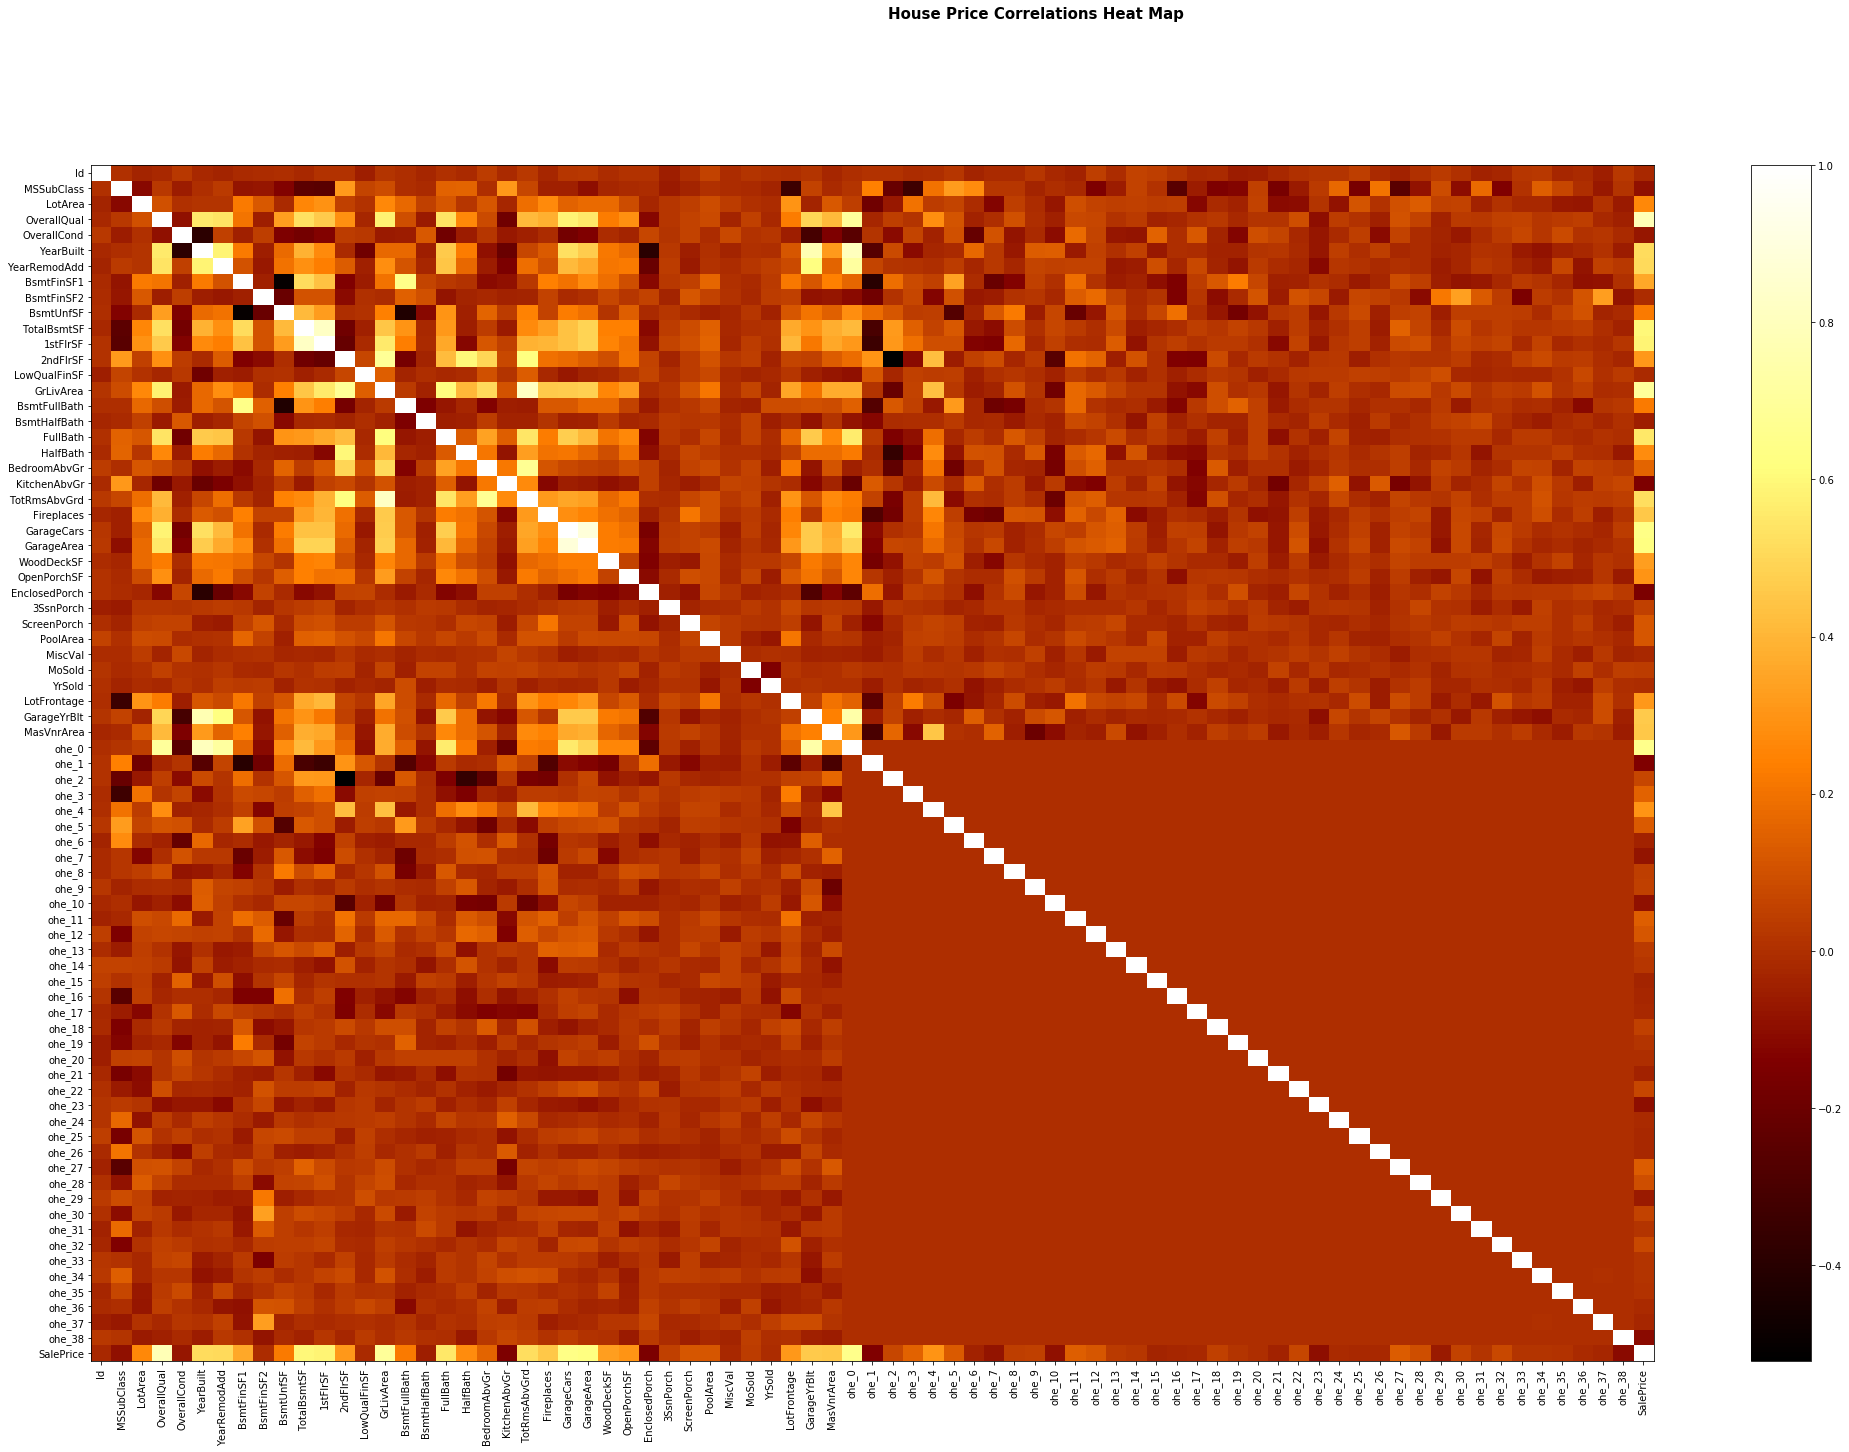

In [61]:
#Compute Correlation
X = housing_X_train_scaled
Y = housing_y_train

#concat both features and corresponding target variable
housing_price = pd.concat([X,Y],axis=1)

corr = housing_price.corr()

fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(35,22)

img = ax1.imshow(corr, cmap='afmhot', interpolation='none', aspect='auto')
plt.colorbar(img)
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('House Price Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [68]:
corr['SalePrice'].abs().sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
ohe_0            0.651579
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.462985
MasVnrArea       0.458948
Fireplaces       0.457549
BsmtFinSF1       0.359460
WoodDeckSF       0.329843
2ndFlrSF         0.314030
LotFrontage      0.312137
ohe_4            0.300540
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ohe_3            0.153889
EnclosedPorch    0.149532
KitchenAbvGr     0.142785
ohe_11           0.140372
                   ...   
ohe_30           0.058949
ohe_18           0.052934
3SsnPorch        0.051532
ohe_9            0.050369
BsmtHalfBath     0.048346
ohe_8            0.047917
MoSold           0.041890
ohe_21      

__As Visisble from the Correlation Heat map, the following features are most significant.__
1. OverallQual
2. YearBuilt
3. YearRemodAdd
4. TotalBsmtSF
5. 1stFlrSF
6. GrLivArea
7. FullBath
8. TotRmsAbvGrd
9. GarageCars
10. GarageArea
11. ohe_0

In [69]:
housing_X_train_selected = housing_X_train_scaled[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','ohe_0']]

housing_X_test_selected = housing_X_test_scaled[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','ohe_0']]


In [70]:
print(housing_X_train_selected.shape)
housing_X_train_selected.head()

(1168, 11)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
254,-0.820445,-0.455469,-1.346063,0.572612,0.374235,-0.407093,-1.055566,-0.964566,-1.056544,-0.863837,-1.468621
1066,-0.088934,0.718609,0.439214,-0.596547,-0.958202,0.083170,0.773664,0.270755,0.295092,-0.456264,1.254291
638,-0.820445,-1.988293,-1.683818,-0.603357,-0.965964,-1.395250,-1.055566,-1.582227,-2.408179,-2.257169,-1.531997
799,-0.820445,-1.107734,-1.683818,-0.750921,-0.487321,0.458975,-1.055566,0.270755,-1.056544,-1.119755,-0.373957
380,-0.820445,-1.531707,-1.683818,-0.081209,-0.370895,0.312087,0.773664,-0.346905,-1.056544,-0.797488,-1.371717


In [71]:
print(housing_X_test_selected.shape)
housing_X_test_selected.head()

(292, 11)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
892,-0.088934,-0.259789,0.873470,-0.006292,-0.262230,-0.876372,-1.055566,-0.346905,-1.056544,-1.006014,-1.071674
1105,1.374088,0.751222,0.487465,0.910874,0.855465,2.088099,0.773664,1.506077,0.295092,1.117159,1.830919
413,-0.820445,-1.433867,-1.683818,-0.122072,-0.365720,-0.952678,-1.055566,-0.964566,0.295092,-0.551048,-2.001723
522,-0.088934,-0.781602,-1.683818,-0.131153,-0.427814,0.260581,0.773664,0.270755,0.295092,-0.266695,-1.754032
1036,2.105599,1.175195,1.114724,1.267297,1.165936,0.176644,0.773664,-0.346905,1.646727,2.065003,2.039851


### Normality Check

As captured earlier, the target variable is not normally distributed.

Let's see the normality distribution of features

#### Distribution of all features

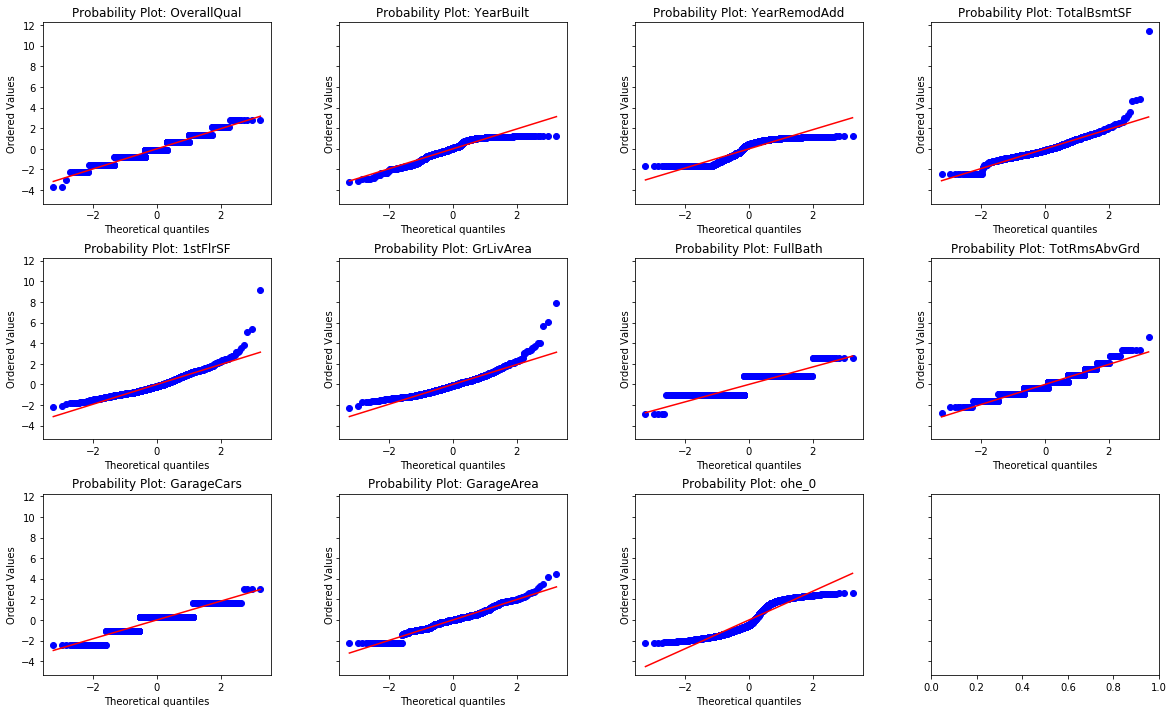

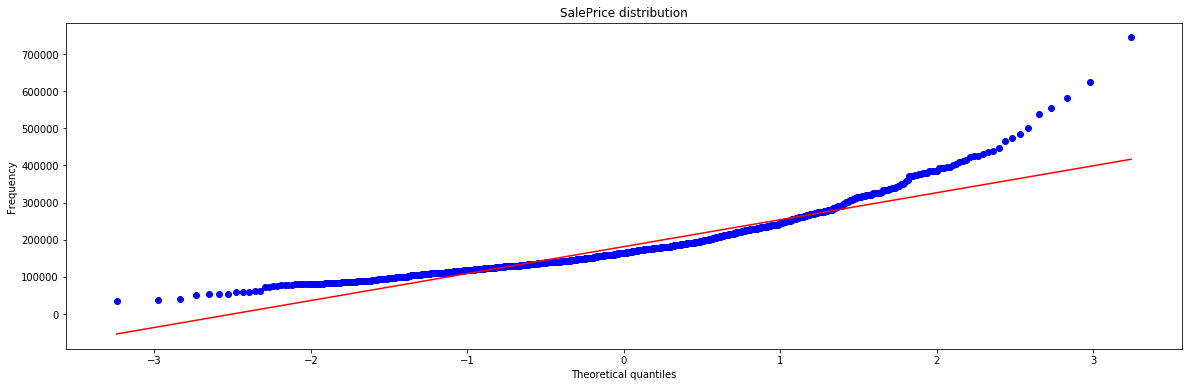

In [72]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=True, figsize=(20,12))
ax = ax.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i, item in enumerate(housing_X_train_selected.keys()):
    prob = stats.probplot(housing_X_train_selected[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))

#Plot the target variable
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
stats.probplot(housing_y_train['SalePrice'], plot=ax)
ax.set_title('SalePrice distribution')
ax.set_ylabel('Frequency')

plt.show()

As visible, almost all features are not normalized. 

Lets convert the data to normal distribution

In [73]:
housing_X_train_selected.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-2.560737e-16,-1.404888e-15,4.638223e-15,1.906770e-16,-1.723317e-16,-1.363778e-16,-1.116877e-16,-1.289874e-16,-3.802134e-17,4.467507e-18,6.216489e-17
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.465060e+00
min,-3.746488e+00,-3.227597e+00,-1.683818e+00,-2.410445e+00,-2.161277e+00,-2.276580e+00,-2.884795e+00,-2.817548e+00,-2.408179e+00,-2.257169e+00,-2.277311e+00
25%,-8.204446e-01,-5.859221e-01,-9.118065e-01,-6.033572e-01,-7.279363e-01,-7.280534e-01,-1.055566e+00,-9.645659e-01,-1.056544e+00,-6.410937e-01,-1.286374e+00
50%,-8.893368e-02,3.373017e-02,4.392138e-01,-1.459097e-01,-1.923741e-01,-1.037785e-01,7.736639e-01,-3.469053e-01,2.950917e-01,2.713693e-02,-5.008610e-01
75%,6.425772e-01,9.795152e-01,9.217210e-01,5.391266e-01,5.883308e-01,5.047584e-01,7.736639e-01,2.707553e-01,2.950917e-01,4.726240e-01,1.571724e+00
max,2.837110e+00,1.273035e+00,1.211225e+00,1.146055e+01,9.113990e+00,7.849169e+00,2.602894e+00,4.594380e+00,2.998363e+00,4.463051e+00,2.645792e+00


In [74]:
#convert the negative values to positive for each feature, as the negative values are not accepted 
#for techniques used to convert into normal distribution.

for feature_name in housing_X_train_selected.columns:
    #get min 
    feature_min = housing_X_train_selected[feature_name].min()
    
    #Add the Maximum negative value in the whole data series (Value + Maximum Negative value + 1)
    housing_X_train_selected[feature_name] = housing_X_train_selected[feature_name] - (feature_min) +1
    
    
housing_X_train_selected

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
254,3.926043,3.772128,1.337755,3.983058,3.535512,2.869486,2.829230,2.852982,2.351635,2.393332,1.808690
1066,4.657554,4.946206,3.123032,2.813899,2.203075,3.359750,4.658459,4.088303,3.703271,2.800905,4.531602
638,3.926043,2.239304,1.000000,2.807088,2.195313,1.881329,2.829230,2.235321,1.000000,1.000000,1.745314
799,3.926043,3.119863,1.000000,2.659524,2.673955,3.735555,2.829230,4.088303,2.351635,2.137414,2.903354
380,3.926043,2.695890,1.000000,3.329237,2.790382,3.588666,4.658459,3.470643,2.351635,2.459681,1.905594
303,3.926043,4.261328,2.061516,3.029569,2.448864,2.068278,2.829230,2.852982,3.703271,3.616052,2.737114
86,4.657554,5.337566,3.653790,2.552824,1.905540,3.338766,4.658459,3.470643,3.703271,2.895690,5.224112
1385,3.194533,2.630664,3.750291,2.807088,2.195313,2.564264,2.829230,4.088303,2.351635,2.137414,2.252269
265,4.657554,4.554847,2.495772,4.228240,3.814936,3.075511,4.658459,4.088303,3.703271,3.729793,3.446392
793,6.120576,5.402792,3.750291,4.396236,4.006393,3.216677,4.658459,4.088303,3.703271,3.246392,5.149563


In [75]:
#convert the negative values to positive for each feature, as the negative values are not accepted 
#for techniques used to convert into normal distribution.

for feature_name in housing_X_test_selected.columns:
    #get min 
    feature_min = housing_X_test_selected[feature_name].min()
    
    #Add the Maximum negative value in the whole data series (Value + Maximum Negative value + 1)
    housing_X_test_selected[feature_name] = housing_X_test_selected[feature_name] - (feature_min) +1
    
    
housing_X_test_selected

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
892,3.926043,3.706902,3.557288,3.404154,2.521307,2.121692,2.829230,2.852982,2.351635,2.251155,2.305757
1105,5.389065,4.717913,3.171283,4.321319,3.639002,5.086163,4.658459,4.705964,3.703271,4.374328,5.208351
413,3.194533,2.532824,1.000000,3.288373,2.417817,2.045386,2.829230,2.235321,3.703271,2.706121,1.375708
522,3.926043,3.185089,1.000000,3.279292,2.355723,3.258645,4.658459,3.470643,3.703271,2.990474,1.623400
1036,6.120576,5.141886,3.798542,4.677742,3.949473,3.174709,4.658459,2.852982,5.054906,5.322173,5.417282
614,2.463022,4.000421,2.061516,2.430233,1.388089,1.286146,2.829230,1.000000,1.000000,1.000000,2.783814
218,4.657554,2.924183,3.702041,2.811629,2.699828,3.811860,2.829230,4.088303,3.703271,3.042606,3.940826
1160,3.926043,4.196101,2.351020,2.941031,1.970221,2.861856,4.658459,3.470643,3.703271,3.085259,2.591083
649,2.463022,3.935195,1.965014,2.430233,1.388089,1.286146,2.829230,1.000000,1.000000,1.000000,2.440614
887,3.194533,3.445996,1.241254,2.852492,2.014205,2.741675,2.829230,4.088303,2.351635,2.421767,2.227071


In [76]:
housing_X_train_selected.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,ohe_0
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,4.746488,4.227597,2.683818,3.410445,3.161277,3.276580,3.884795,3.817548,3.408179,3.257169,3.277311
std,1.000428,1.000428,1.000428,1.000428,1.000428,1.000428,1.000428,1.000428,1.000428,1.000428,1.465060
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.926043,3.641675,1.772012,2.807088,2.433340,2.548526,2.829230,2.852982,2.351635,2.616076,1.990937
50%,4.657554,4.261328,3.123032,3.264536,2.968903,3.172801,4.658459,3.470643,3.703271,3.284306,2.776450
75%,5.389065,5.207113,3.605539,3.949572,3.749608,3.781338,4.658459,4.088303,3.703271,3.729793,4.849035
max,7.583598,5.500632,3.895043,14.870991,12.275267,11.125749,6.487689,8.411928,6.406542,7.720220,5.923103


In [77]:
#Transform all the feature
for feature_name in housing_X_train_selected.columns:
    normal_feature,lambda_boxcox_train_independent_features = stats.boxcox(housing_X_train_selected[feature_name])
    housing_X_train_selected[feature_name] = normal_feature
    
#Transform the target variable
housing_y_train_normal,lambda_boxcox_train_SalePrice = stats.boxcox(housing_y_train['SalePrice'])
housing_y_train['SalePrice'] = housing_y_train_normal

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
#Transform all the feature
for feature_name in housing_X_test_selected.columns:
    normal_feature_test = stats.boxcox(housing_X_test_selected[feature_name], 
                                         lmbda=lambda_boxcox_train_independent_features)
    housing_X_test_selected[feature_name] = normal_feature_test

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


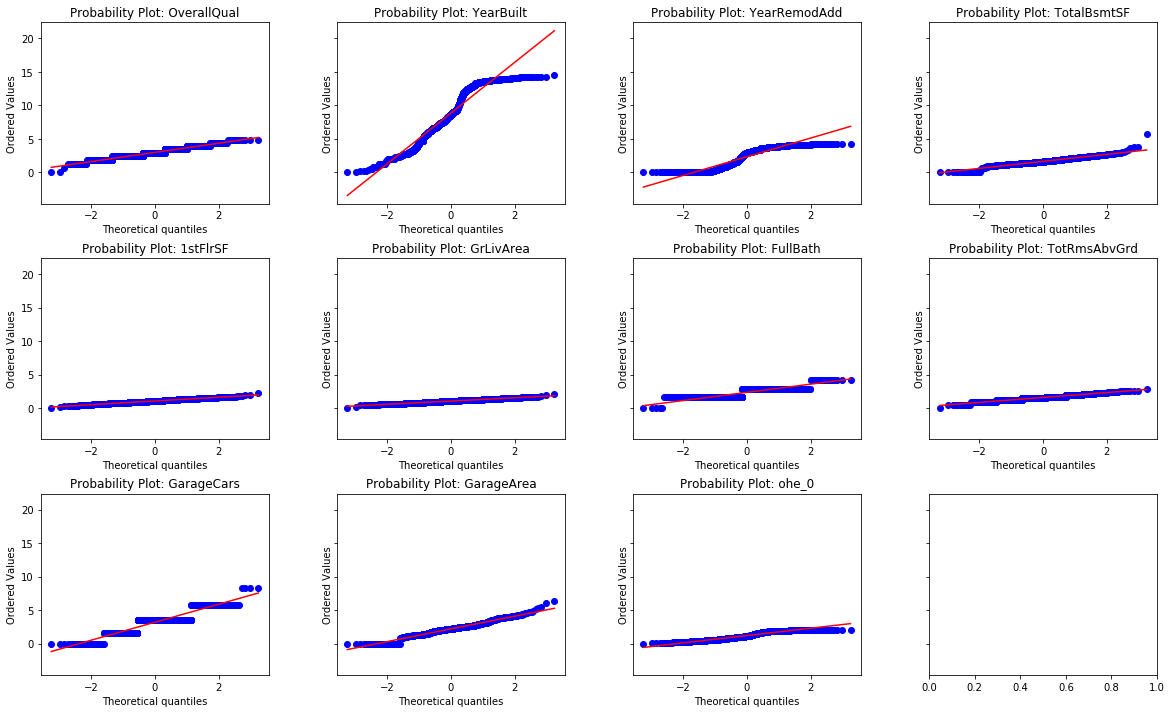

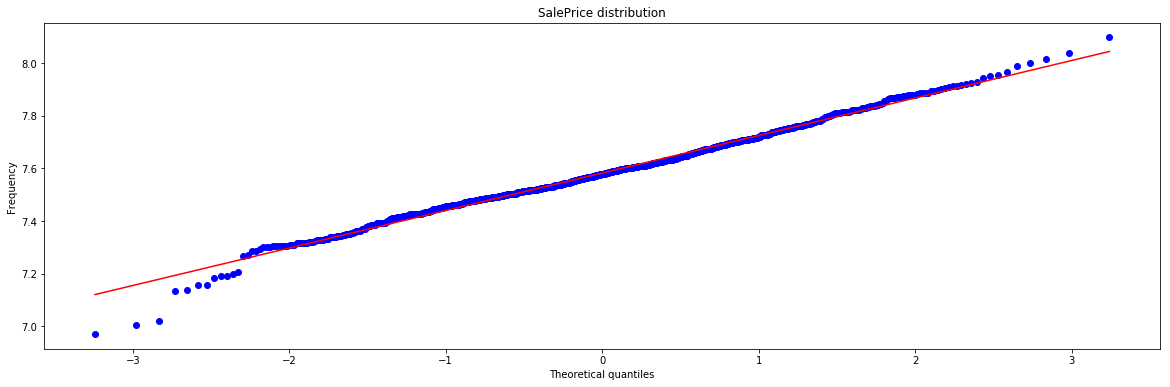

In [79]:
#Check if all features 
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=False, sharey=True, figsize=(20,12))
ax = ax.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i, item in enumerate(housing_X_train_selected.keys()):
    prob = stats.probplot(housing_X_train_selected[item], dist=stats.norm, plot=ax[i])
    _= ax[i].set_title('Probability Plot: {0}'.format(item))


#Plot the target variable
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
stats.probplot(housing_y_train_normal, plot=ax)
ax.set_title('SalePrice distribution')
ax.set_ylabel('Frequency')

plt.show()

__Though the features & target variable doesn't look to belong from normal distribution completely, but its improved.__

### Perepared data

In [80]:
print(housing_X_train_selected.shape)
print(housing_y_train.shape)
print(housing_X_test_selected.shape)
print(housing_y_test.shape)

(1168, 11)
(1168, 1)
(292, 11)
(292, 1)


## Select Model

### Linear regression

#### Train model

In [84]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(housing_X_train_selected, housing_y_train)

# Make predictions using the testing set
housing_y_test_pred = regr.predict(housing_X_test_selected)

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

#### Evaluate model

In [85]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Root Mean squared error: 70851.63


#### R2 score

In [86]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.34553584033814433

#### Adjusted R2

In [87]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.11419036994604648

__The Adjusted R2 is very low, hence the linear regressor doesnt look to perform well.__

### Dicision tree

In [88]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(housing_X_train_selected, housing_y_train)
housing_y_test_pred = clf.predict(housing_X_test_selected)

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

#### Evaluate model

In [89]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Root Mean squared error: 72878.75


#### R2 score

In [90]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.30755069269036994

#### Adjusted R2

In [91]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.062777914292547199

__The Adjusted R2 is even more very low, hence the Decision Tree regressior doesnt look to perform well.__

### Random Forest

In [92]:
regr = RandomForestRegressor(max_depth=10)
regr.fit(housing_X_train_selected, housing_y_train)
housing_y_test_pred = regr.predict(housing_X_test_selected)

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Evaluate model

In [93]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Root Mean squared error: 83123.63


#### R2 score

In [94]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.099185841239799788

#### Adjusted R2

In [95]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-0.21924148929868958

R2  compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

__The Adjusted R2 is even more very low, hence the Random Forest regressior doesnt look to perform well.__

__Bottom line:__ a negative R2 is not a mathematical impossibility or the sign of a computer bug. It simply means that the chosen model (with its constraints) fits the data really poorly.



### SVM

In [96]:
clf = svm.SVR()
clf.fit(housing_X_train_selected, housing_y_train)
housing_y_test_pred = clf.predict(housing_X_test_selected)

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Evaluate model

In [97]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Root Mean squared error: 94599.31


#### R2 score

In [98]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

-0.16670787209796933

#### Adjusted R2

In [99]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-0.57912553851399573

### AdaBoost


__AdaBoost is best used to boost the performance of decision trees on binary classification problems.__

### Gradient boosting Decision tree

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.


In [100]:
gbrt=GradientBoostingRegressor(n_estimators=500) 
gbrt.fit(housing_X_train_selected, housing_y_train) 
housing_y_test_pred=gbrt.predict(housing_X_test_selected) 

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

/Users/samyam/anaconda3/envs/deeplog/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Evaluate model

In [101]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))


Root Mean squared error: 80373.62


#### R2 score

In [102]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.15780397265403023

#### Adjusted R2

In [103]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-0.13990253003570796

### XGBoost

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

1. Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
2. The depth of trees (tree_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
3. Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

In [104]:
model = XGBRegressor(learning_rate=0.4, n_estimators=200)
model.fit(housing_X_train_selected, housing_y_train)
housing_y_test_pred=model.predict(housing_X_test_selected) 

housing_y_pred_actual = inv_boxcox(housing_y_test_pred, lambda_boxcox_train_SalePrice)

#### Evaluate model

Root Mean squared error: 84158.08
[ 0.05864197  0.10030864  0.06558642  0.12268519  0.125       0.14351852
  0.01311728  0.03317901  0.00925926  0.13117284  0.19753087]


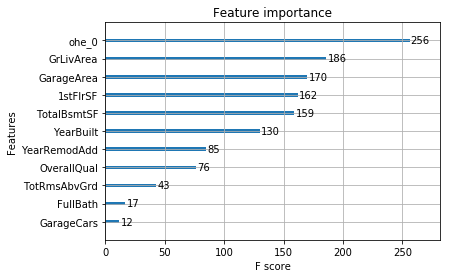

In [105]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_pred_actual)))
print(model.feature_importances_)
plot_importance(model)

#### R2 score

In [106]:
r2_sco = r2_score(housing_y_test, housing_y_pred_actual)
r2_sco

0.076625684736635447

#### Adjusted R2

In [107]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-0.24977639879832148

## Fine-Tune Our Model (Parameter Tuning)

## Analyze the Best Models and Their Errors

## Evaluate Our System on the Test Set

## Validation of predictions

In [ ]:
#Chi Squre test can be used

## Reference
    1. https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning/notebook
    2. https://machinelearningmastery.com/feature-selection-machine-learning-python/
    3. https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
    4. https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e
    5. http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    6. https://shankarmsy.github.io/stories/gbrt-sklearn.html
    7. https://machinelearningmastery.com/xgboost-python-mini-course/